CLASSIFICAÇÃO COM DADOS DESBALANCEADOS

Carregamento da base de dados

In [1]:
import pandas as pd
import random
import numpy as np

In [2]:
dataset = pd.read_csv('csv_result-ebay_confianca_completo.csv')
dataset.shape

(5806, 75)

In [3]:
dataset.head(2)

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom


In [4]:
dataset['blacklist'] = dataset['blacklist'] == 'S'

In [5]:
dataset.head(2)

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,False,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,False,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom


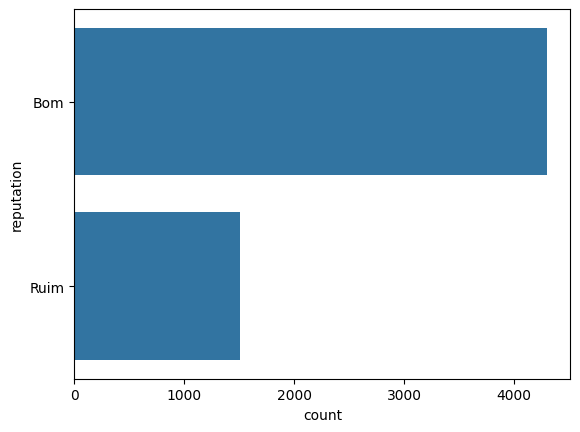

In [6]:
import seaborn as sns
sns.countplot(dataset['reputation']);

In [7]:
len(dataset.columns)
x = dataset.iloc[:,0:74].values
x.shape

(5806, 74)

In [10]:
y = dataset.iloc[:,74].values
y

array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Ruim', 'Ruim'],
      shape=(5806,), dtype=object)

In [11]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

Base de treinamento e teste

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y)

In [14]:
x_treinamento.shape, y_treinamento.shape

((4644, 74), (4644,))

In [15]:
x_teste.shape, y_teste.shape

((1162, 74), (1162,))

Classificação com Random Forest 

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
modelo = RandomForestClassifier()
modelo.fit(x_treinamento, y_treinamento)

RandomForestClassifier()

In [21]:
previsoes = modelo.predict(x_teste)
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

0.7418244406196214

SUBAMOSTRAGEM (undersampling) - Tomek links

In [24]:
from imblearn.under_sampling import TomekLinks

In [26]:
tl = TomekLinks(sampling_strategy='majority')
x_under, y_under = tl.fit_resample(x, y)

In [27]:
x_under.shape, y_under.shape

((5417, 74), (5417,))

In [28]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [29]:
np.unique(y_under, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([3910, 1507]))

In [30]:
x_treinamento_u, x_teste_u, y_treinamento_u, y_teste_u = train_test_split(x_under, y_under, 
                                                                          test_size = 0.2, stratify = y_under)
x_treinamento_u.shape, x_teste_u.shape

((4333, 74), (1084, 74))

In [31]:
#MODELO RANDOM FOREST
modelo_u = RandomForestClassifier()
modelo_u.fit(x_treinamento_u, y_treinamento_u)
previsoes_u = modelo_u.predict(x_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.7250922509225092

Sobreamostragem (oversampling) - SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
smote = SMOTE(sampling_strategy='minority')
x_over, y_over = smote.fit_resample(x, y)

In [34]:
x_over.shape, y_over.shape

((8598, 74), (8598,))

In [35]:
np.unique(y, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [36]:
np.unique(y_over, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 4299]))

In [41]:
x_treinamento_o, x_teste_o, y_treinamento_o, y_teste_o = train_test_split(x_over, y_over, 
                                                                          test_size = 0.2, stratify = y_over)
x_treinamento_o.shape, x_teste_o.shape

((6878, 74), (1720, 74))

In [40]:
modelo_o = RandomForestClassifier()
modelo_o.fit(x_treinamento_o, y_treinamento_o)
previsoes_o = modelo_o.predict(x_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.8174418604651162